In [448]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy import stats
import xport

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)
import warnings
warnings.filterwarnings('ignore') 


from pandas.plotting import scatter_matrix

## Import data: features and target

In [449]:
def clean_epsilon(cell):
    if cell - 0.0 < 0.0001:
        return 0
    return cell

In [450]:
def concat_rename_df(file_cols,renamed_cols,csv_name):
    dfs = pd.DataFrame(columns = renamed_cols)
    for tp in file_cols:
        file = tp[0]
        cols = tp[1]
        df = file[cols]        
        df.columns = renamed_cols
        dfs = pd.concat([dfs, df])                      
    dfs = dfs.applymap(clean_epsilon)                
    dfs.set_index("SEQN", inplace=True)             # set SEQN to index of the df 
    dfs = dfs[~dfs.index.duplicated(keep='first')]  # if has duplicated SEQN's, keep the first one 
    # dfs.to_csv(csv_name,index=False,sep=',')      # uncomment this line if needs to get csv files 
    return dfs

In [451]:
# Demographic
datadir = 'data/'
demo = pd.read_sas(datadir+'DEMO.XPT')
demo_B = pd.read_sas(datadir+'DEMO_B.XPT')
demo_C = pd.read_sas(datadir+'DEMO_C.XPT')
demo_cols = ['SEQN','RIAGENDR','RIDAGEYR', 'RIDRETH1', 'INDFMINC', 'DMDEDUC','DMDHRMAR','DMQMILIT']
demo_renamed_cols = ['SEQN', 'gender', 'age', 'race', 'family income', 'education', 'marital status','military']
demo_cols_type = ['SEQN','c','n','c','c','c','c','c']
demo_file_cols = [(demo,demo_cols),(demo_B,demo_cols),(demo_C,demo_cols)]
df_demo = concat_rename_df(demo_file_cols,demo_renamed_cols,"df_demo.csv")

# Occupation
# both employment status and weekly work hrs describe situation in the 'past week'
OCD = pd.read_sas(datadir+'OCQ.XPT')
OCD_B = pd.read_sas(datadir+'OCQ_B.XPT')
OCD_C = pd.read_sas(datadir+'OCQ_C.XPT')
OCD_cols = ['SEQN', 'OCQ150', 'OCQ180']
OCD_B_cols = ['SEQN', 'OCD150', 'OCD180']
OCD_C_cols = ['SEQN', 'OCD150', 'OCQ180']
oc_renamed_cols = ['SEQN','Employment status','weekly work hrs']
oc_cols_type = ['SEQN','c','n']
oc_file_cols = [(OCD,OCD_cols),(OCD_B,OCD_B_cols),(OCD_C,OCD_C_cols)]
df_oc = concat_rename_df(oc_file_cols,oc_renamed_cols,"df_oc.csv")

# Housing characteristics
HOQ = pd.read_sas(datadir+'HOQ.XPT')
HOQ_B = pd.read_sas(datadir+'HOQ_B.XPT')
HOQ_C = pd.read_sas(datadir+'HOQ_C.XPT')
hc_cols_1 = ['SEQN', 'HOD010', 'HOQ065']
hc_cols_2 = ['SEQN', 'HOD011', 'HOQ065']
hc_renamed_cols = ['SEQN','home type','home ownership']
hc_cols_type = ['SEQN','c','c']
hc_file_cols = [(HOQ,hc_cols_1),(HOQ_B,hc_cols_1),(HOQ_C,hc_cols_2)]
df_hc = concat_rename_df(hc_file_cols,hc_renamed_cols,"df_hc.csv")

# Food security(household)
FSQ = pd.read_sas(datadir+'FSQ.xpt')
FSQ_B = pd.read_sas(datadir+'FSQ_B.xpt')
FSQ_C = pd.read_sas(datadir+'FSQ_C.xpt')
fsq_cols = ['SEQN', 'HHFDSEC']
fsq_cols_1 = ['SEQN', 'FSDHH']
fsq_renamed_cols = ['SEQN','HH food security']
fsq_cols_type = ['SEQN','c']
fsq_file_cols = [(FSQ,fsq_cols),(FSQ_B,fsq_cols),(FSQ_C,fsq_cols_1)]
df_fsq = concat_rename_df(fsq_file_cols,fsq_renamed_cols,"df_fsq.csv")

# Social support
SSQ = pd.read_sas(datadir+'SSQ.xpt')
SSQ_B = pd.read_sas(datadir+'SSQ_B.xpt')
SSQ_C = pd.read_sas(datadir+'SSQ_C.xpt')
SSQ_cols = ['SEQN', 'SSQ010','SSQ050']
SSQ_cols_1 = ['SEQN', 'SSD011','SSD051']
SSQ_cols_2 = ['SEQN', 'SSQ011','SSQ051']
SSQ_renamed_cols = ['SEQN','emotional support','financial support']
SSQ_cols_type = ['SEQN','c','c']
SSQ_file_cols = [(SSQ,SSQ_cols),(SSQ_B,SSQ_cols_1),(SSQ_C,SSQ_cols_2)]
df_ssq = concat_rename_df(SSQ_file_cols,SSQ_renamed_cols,"df_SSQ.csv")

# Alcohol use
alco = pd.read_sas(datadir+'ALQ.XPT')
alco_B = pd.read_sas(datadir+'ALQ_B.XPT')
alco_C = pd.read_sas(datadir+'ALQ_C.XPT')
alco_cols = ['SEQN', 'ALQ100', 'ALQ120Q', 'ALQ120U']
alco_B_cols = ['SEQN', 'ALD100', 'ALQ120Q', 'ALQ120U']
alco_C_cols = ['SEQN', 'ALQ101', 'ALQ120Q', 'ALQ120U']
alco_renamed_cols = ['SEQN','freq:12 drinks/yr?','alco_freq_num','alco_freq_cat']
alco_cols_type = ['SEQN','c','n','c']
alco_file_cols = [(alco,alco_cols),(alco_B,alco_B_cols),(alco_C,alco_C_cols)]
df_alco = concat_rename_df(alco_file_cols,alco_renamed_cols,"df_alco.csv")

# Drug use
DUQ = pd.read_sas(datadir+'DUQ.XPT')
DUQ_B = pd.read_sas(datadir+'DUQ_B.XPT')
DUQ_C = pd.read_sas(datadir+'DUQ_C.XPT')
du_cols = ['SEQN', 'DUQ100']
du_renamed_cols = ['SEQN','ever use cocaine']
du_cols_type = ['SEQN','c']
du_file_cols = [(DUQ,du_cols),(DUQ_B,du_cols),(DUQ_C,du_cols)]
df_du = concat_rename_df(du_file_cols,du_renamed_cols,"df_du.csv")

# Hospital Utilization & Access to Care (HUAC)
HUQ = pd.read_sas(datadir+'HUQ.XPT')
HUQ_B = pd.read_sas(datadir+'HUQ_B.XPT')
HUQ_C = pd.read_sas(datadir+'HUQ_C.XPT')
huac_cols = ['SEQN', 'HUQ010', 'HUQ020', 'HUQ090','HUQ050']
huac_renamed_cols = ['SEQN', 'health conditions', 'health compared to a year ago', 'visit to mental pro','#times received healthcare/yr']
huac_cols_type = ['SEQN','c','c','c']
huac_file_cols = [(HUQ,huac_cols),(HUQ_B,huac_cols),(HUQ_C,huac_cols)]
df_huac = concat_rename_df(huac_file_cols,huac_renamed_cols,"df_huac.csv")

# Smoking
SMQ = pd.read_sas(datadir+'SMQ.XPT')
SMQ_B = pd.read_sas(datadir+'SMQ_B.XPT')
SMQ_C = pd.read_sas(datadir+'SMQ_C.XPT')
sm_cols = ['SEQN', 'SMQ020', 'SMQ040', 'SMD070','SMD080','SMQ050Q','SMQ050U','SMD075', 'SMD100NI']
sm_cols_c = ['SEQN', 'SMQ020', 'SMQ040', 'SMD070','SMD641','SMQ050Q','SMQ050U','SMD075', 'SMD100NI']
sm_renamed_cols = ['SEQN','sm 100 cig?','cur sm status','sm daily freq','sm monthly freq','quit sm num','quit sm unit','sm yrs','nicotine content']
sm_cols_type = ['SEQN','c','c','n','n','n','c','n','n']
sm_file_cols = [(SMQ,sm_cols),(SMQ_B,sm_cols),(SMQ_C,sm_cols_c)]
df_sm = concat_rename_df(sm_file_cols,sm_renamed_cols,"df_sm.csv")

# Physical Activity - Individual Activities (PA)¶
PAQIAF = pd.read_sas(datadir+'PAQIAF.XPT')
PAQIAF_B = pd.read_sas(datadir+'PAQIAF_B.XPT')
PAQIAF_C = pd.read_sas(datadir+'PAQIAF_C.XPT')
PAQIAF_cols = ['SEQN','PADLEVEL','PADTIMES','PADDURAT']
pa_renamed_cols = ['SEQN','activity level','monthly activity freq','activity duration']
pa_cols_type = ['SEQN','c','n','n']
pa_file_cols = [(PAQIAF,PAQIAF_cols),(PAQIAF_B,PAQIAF_cols),(PAQIAF_C,PAQIAF_cols)]
df_pa = concat_rename_df(pa_file_cols,pa_renamed_cols,"df_pa.csv")

# Weight history (WH)
WHQ = pd.read_sas(datadir+'WHQ.XPT')
WHQ_B = pd.read_sas(datadir+'WHQ_B.XPT')
WHQ_C = pd.read_sas(datadir+'WHQ_C.XPT')
WHQ_cols = ['SEQN', 'WHD010', 'WHD020','WHD040', 'WHD050']
WHQ_B_cols = ['SEQN', 'WHD010', 'WHD020','WHQ040', 'WHD050']
WHQ_C_cols = ['SEQN', 'WHD010', 'WHD020','WHQ040', 'WHD050']
wh_renamed_cols = ['SEQN','cur height(in)','cur weight(lb)','weight goal','past weight(-1yr)(lb)']
wh_cols_type = ['SEQN','n','n','c','n']
wh_file_cols = [(WHQ,WHQ_cols),(WHQ_B,WHQ_B_cols),(WHQ_C,WHQ_C_cols)]
df_wh = concat_rename_df(wh_file_cols,wh_renamed_cols,"df_wh.csv")

# Serum vitamin B12 and serum folate 
L06 = pd.read_sas(datadir+'LAB06.XPT')
L06_B = pd.read_sas(datadir+'L06_B.XPT')
L06_C = pd.read_sas(datadir+'L06NB_C.XPT')
L06_cols = ['SEQN', 'LBXFOL', 'LBXB12']
L06_cols_type = ['SEQN','n','n']
L06_renamed_cols = ['SEQN','Serum folate(ng/ml)','serum VB12(pg/ml)']
L06_file_cols = [(L06,L06_cols),(L06_B,L06_cols),(L06_C,L06_cols)]
df_L06 = concat_rename_df(L06_file_cols,L06_renamed_cols,"df_L06.csv")

# Diabetes
DIQ = pd.read_sas(datadir+'DIQ.XPT')
DIQ_B = pd.read_sas(datadir+'DIQ_B.XPT')
DIQ_C = pd.read_sas(datadir+'DIQ_C.XPT')
db_cols = ['SEQN','DIQ010']
db_renamed_cols = ['SEQN','diabetes status']
db_cols_type = ['SEQN','c']
db_file_cols = [(DIQ,db_cols),(DIQ_B,db_cols),(DIQ_C,db_cols)]
df_db = concat_rename_df(db_file_cols,db_renamed_cols,"df_db.csv")

# Body pain(joint)
MPQ = pd.read_sas(datadir+'MPQ.XPT')
MPQ_B = pd.read_sas(datadir+'MPQ_B.XPT')
MPQ_C = pd.read_sas(datadir+'MPQ_C.XPT')
mpq_cols = ['SEQN','MPQ010']
# Joint pain/aching/stiffness in past year? [7,9]
mpq_renamed_cols = ['SEQN','pain (last yr)']  
mpq_cols_type = ['SEQN','c']
mpq_file_cols = [(MPQ,mpq_cols),(MPQ_B,mpq_cols),(MPQ_C,mpq_cols)]
df_mpq = concat_rename_df(mpq_file_cols,mpq_renamed_cols,"df_mpq.csv")

# Prescription medicine
RXQ = pd.read_sas(datadir+'RXQ_RX.XPT')
RXQ_B = pd.read_sas(datadir+'RXQ_RX_B.XPT')
RXQ_C = pd.read_sas(datadir+'RXQ_RX_C.XPT')
RXQ_cols = ['SEQN','RXD030']
RXQ_cols_1 = ['SEQN','RXDUSE']
# Taken prescription medicine/past month
RXQ_renamed_cols = ['SEQN','prescr. medicine']  
RXQ_cols_type = ['SEQN','c']
RXQ_file_cols = [(RXQ,RXQ_cols),(RXQ_B,RXQ_cols),(RXQ_C,RXQ_cols_1)]
df_rxq = concat_rename_df(RXQ_file_cols,RXQ_renamed_cols,"df_RXQ.csv")

In [452]:
dfx = pd.merge(df_demo,df_fsq, on = 'SEQN') 
dfx = pd.merge(dfx,df_hc, on = 'SEQN') 
dfx = pd.merge(dfx,df_huac, on = 'SEQN') 
# maximize the number of entries for merging with y
dfx = dfx.join(df_oc, on = 'SEQN') 
dfx = dfx.join(df_wh, on = 'SEQN') 
dfx = dfx.join(df_sm, on = 'SEQN') 
dfx = dfx.join(df_alco, on = 'SEQN') 
dfx = dfx.join(df_du, on = 'SEQN') 
dfx = dfx.join(df_pa, on = 'SEQN') 
dfx = dfx.join(df_L06, on = 'SEQN')
dfx = dfx.join(df_db, on = 'SEQN') 
dfx = dfx.join(df_mpq, on = 'SEQN') 
dfx = dfx.join(df_rxq, on = 'SEQN') 
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31126 entries, 1.0 to 31126.0
Data columns (total 40 columns):
gender                           31126 non-null float64
age                              31126 non-null float64
race                             31126 non-null float64
family income                    30593 non-null float64
education                        25920 non-null float64
marital status                   28487 non-null float64
military                         17980 non-null float64
HH food security                 29719 non-null float64
home type                        30658 non-null float64
home ownership                   30658 non-null float64
health conditions                31121 non-null float64
health compared to a year ago    29602 non-null float64
visit to mental pro              27110 non-null float64
#times received healthcare/yr    31121 non-null float64
Employment status                18884 non-null float64
weekly work hrs                  9316 non-nul

In [453]:
# Panic disorder
CIQPANIC = pd.read_sas(datadir+'CIQPANIC.XPT')
CIQPANIC_B = pd.read_sas(datadir+'CIQPAN_B.XPT')
CIQPANIC_C = pd.read_sas(datadir+'CIQPAN_C.XPT')
CIQPANIC_cols = ['SEQN', 'CIDPSCOR']
pd_renamed_cols = ['SEQN', 'Panic_Disorder_Diagnosis']
pd_file_cols = [(CIQPANIC,CIQPANIC_cols),(CIQPANIC_B,CIQPANIC_cols),(CIQPANIC_C,CIQPANIC_cols)]
df_pd = concat_rename_df(pd_file_cols,pd_renamed_cols,"df_pd.csv")

# Anxiety disorder
CIQGAD = pd.read_sas(datadir+'CIQGAD.XPT')
CIQGAD_B = pd.read_sas(datadir+'CIQGAD_B.XPT')
CIQGAD_C = pd.read_sas(datadir+'CIQGAD_C.XPT')
CIQGAD_cols = ['SEQN', 'CIDGSCOR']
ad_renamed_cols = ['SEQN', 'Anxiety_Disorder_Diagnosis']
ad_file_cols = [(CIQGAD,CIQGAD_cols),(CIQGAD_B,CIQGAD_cols),(CIQGAD_B,CIQGAD_cols)]
df_ad = concat_rename_df(ad_file_cols,ad_renamed_cols,"df_ad.csv")

# Depression disorder
CIQDEP = pd.read_sas(datadir+'CIQMDEP.XPT')
CIQDEP_B = pd.read_sas(datadir+'CIQDEP_B.XPT')
CIQDEP_C = pd.read_sas(datadir+'CIQDEP_C.XPT')
CIQDEP_cols = ['SEQN', 'CIDDSCOR']
dps_renamed_cols = ['SEQN','Depression_Diagnosis']
dps_file_cols = [(CIQDEP,CIQDEP_cols),(CIQDEP_B,CIQDEP_cols),(CIQDEP_C,CIQDEP_cols)]
df_dps = concat_rename_df(dps_file_cols,dps_renamed_cols,"df_dps.csv")

# df - y
dfy1 = pd.merge(df_pd, df_ad, on = 'SEQN', left_index = True, sort = False)
dfy2 = pd.merge(dfy1, df_dps, on = 'SEQN', left_index = True, sort = False)
dfy = dfy2.dropna()
print('Before dropping NaN, the number of entries is: ',dfy2.shape[0])
print('After dropping NaN, the number of entries is: ',dfy.shape[0])
dfy = dfy.replace(5, 0)
dfy.head(20)

Before dropping NaN, the number of entries is:  1706
After dropping NaN, the number of entries is:  1525


,Panic_Disorder_Diagnosis,Anxiety_Disorder_Diagnosis,Depression_Diagnosis
SEQN,,,
12.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0
34.0,1.0,0.0,0.0
66.0,0.0,0.0,0.0
69.0,0.0,0.0,0.0
81.0,0.0,0.0,0.0
97.0,0.0,0.0,0.0
107.0,0.0,0.0,0.0
120.0,0.0,0.0,0.0


In [454]:
# dfy['mental illness'] = 0
# dfy['mental illness'] = dfy['Panic_Disorder_Diagnosis']+dfy['Anxiety_Disorder_Diagnosis']+dfy['Depression_Diagnosis']
# # dfy = dfy.drop(['Panic_Disorder_Diagnosis','Anxiety_Disorder_Diagnosis','Depression_Diagnosis'],axis=1)
# dfy.head()
# dfy['mental illness'].value_counts()

In [455]:
dfy.stack().value_counts()
dfy['mental illness'] = 0
dfy.loc[dfy.Panic_Disorder_Diagnosis == 1, 'mental illness'] = 1
dfy.loc[dfy.Anxiety_Disorder_Diagnosis == 1, 'mental illness'] = 1
dfy.loc[dfy.Depression_Diagnosis == 1, 'mental illness'] = 1
dfy = dfy.drop(['Panic_Disorder_Diagnosis','Anxiety_Disorder_Diagnosis','Depression_Diagnosis'],axis=1)
dfy['mental illness'].value_counts()

0    1388
1     137
Name: mental illness, dtype: int64

In [456]:
df0 = pd.merge(dfy, dfx, on = 'SEQN', left_index = True, sort = False)
df0.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1525 entries, 12.0 to 20925.0
Data columns (total 41 columns):
mental illness                   1525 non-null int64
gender                           1525 non-null float64
age                              1525 non-null float64
race                             1525 non-null float64
family income                    1502 non-null float64
education                        1525 non-null float64
marital status                   1391 non-null float64
military                         1525 non-null float64
HH food security                 1453 non-null float64
home type                        1505 non-null float64
home ownership                   1505 non-null float64
health conditions                1525 non-null float64
health compared to a year ago    1525 non-null float64
visit to mental pro              1525 non-null float64
#times received healthcare/yr    1525 non-null float64
Employment status                1525 non-null float64
weekly 

In [457]:
# Create a copy of dataframe df0 (the original data input), all modifications will be done on the copy dataframe df
df = df0.copy(deep=True)
df.head()

,mental illness,gender,age,race,family income,education,marital status,military,HH food security,home type,...,alco_freq_cat,ever use cocaine,activity level,monthly activity freq,activity duration,Serum folate(ng/ml),serum VB12(pg/ml),diabetes status,pain (last yr),prescr. medicine
SEQN,,,,,,,,,,,,,,,,,,,,,
12.0,0,1.0,37.0,3.0,11.0,3.0,1.0,1.0,1.0,2.0,...,2.0,1.0,1.0,4.0,90.0,23.0,730.0,2.0,2.0,1.0
20.0,0,2.0,23.0,1.0,6.0,1.0,NaN,2.0,1.0,4.0,...,1.0,1.0,1.0,1.0,30.0,19.9,260.0,2.0,1.0,2.0
34.0,1,2.0,38.0,4.0,5.0,2.0,1.0,2.0,3.0,1.0,...,1.0,1.0,1.0,30.0,30.0,8.4,1218.0,2.0,1.0,2.0
66.0,0,1.0,37.0,1.0,6.0,3.0,5.0,2.0,1.0,2.0,...,NaN,2.0,2.0,15.0,20.0,12.1,498.0,2.0,2.0,2.0
69.0,0,1.0,27.0,4.0,5.0,3.0,5.0,2.0,2.0,4.0,...,1.0,2.0,1.0,120.0,15.0,6.0,661.0,2.0,2.0,2.0


# Process data


### Data preprocessing work flow

    - Missing values
    - Noisy data (outliers need to be dealt with)
    - Inconsistent data (human error / duplication)
    
* Not dropping any data since we only have 1500+ entries. Convert 7/9 responses and outliers into NaN and then predict them.

* Handling response 7/9: don't know & refuse (refer as constraint - cstr)
* Outliers

In [458]:
# function:  get_cstr_ratio(df,feature,cstr)
# purpose:   get the percentage of 'don't know' and 'refuse' out of number of entries
# input:     cstr: a list of two integers. ex: [77,99] 
# output:    ratios of dk/entries and refuse/entries 

def get_cstr_ratio(df,feature,cstr):
    total_count = df.shape[0]
    dk = cstr[0]      # don't know
    refuse = cstr[1]  # refuse to answer
    
    feature_counts = df[feature].value_counts().to_dict()
    if dk not in feature_counts: dk = 0         # When there's no 'dk'/'refuse' in responses
    else: dk = feature_counts[dk]
    if refuse not in feature_counts: refuse = 0
    else: refuse = feature_counts[refuse]

    dk = int(dk)
    refuse = int(refuse)
    r1 = dk/total_count
    r2 = refuse/total_count
    print()
    print('The ratio of [dont know] is', r1)
    print('The ratio of [refuse] is', r2)
    print('Now call: process_cstr(df,feature,cstr,method)')

# function:  process_cstr(df,feature,cstr,method)
# purpose:   if cstr ratio is high, then replace cstr with NaN and deal with NaN later
#            if cstr ratio is low, then drop entries with cstr
# input:     cstr: a list of two integers. ex: [77,99]
#            method: select among 'drop', 'NaN'
# output:    

def process_cstr(df,feature,cstr,method):
    dk = cstr[0] # don't know
    refuse = cstr[1]  # refuse to answer
    if method == 'drop':
        df = df[df[feature] != dk]
        df = df[df[feature] != refuse]
    elif method == 'NaN':
        df[feature][df[feature] == dk] = np.nan
        df[feature][df[feature] == refuse] = np.nan
#         df.loc[df.feature == dk, feature] = np.nan
#         df.loc[df.feature == refuse, feature] = np.nan
    else:
        print('The method you choose is not included yet, add new method now!')
    return df


In [459]:
def get_value_count(df,feature): 
    print()
    print('NaN   ',df[feature].isna().sum())
    print(df[feature].value_counts())


In [460]:
def feature_info(df,feature):
    get_value_count(df,feature)
    plot_feature(feature)
    get_NaN_ratio(df,feature)

* Convert outliers into NaN: 
    * z score
    * a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.M

In [461]:
# numerical variable
def outlier(df,feature,convert):
    plt.figure()
    sns.boxplot(x=df[feature])
    
    data = df[feature]
    outliers = []    
    threshold = 3
    mean = data.mean()
    std = data.std()
    before = df[feature].isna().sum()
    for data_point in data :
        z_score = (data_point - mean )/std  
        if np.abs(z_score) > threshold:
            outliers.append(data_point)
            if convert == True:
                df[feature][df[feature] == data_point] = np.NaN
    print('for',feature)
    print(len(outliers),'outliers detected')
    print(sorted(outliers))
    print()
#     after = df[feature].isna().sum()
#     print(before-after,'should be the same as # outliers detected if convert == true')


# Dealing with missing values
1. Get missing values information

        A. Get the ratio of missing values
        B. Visualize abundances of missing values between different features
2. Fill or predict missing values
    
        A. Fill NaN will mean/mode
        B. Predict NaN with machine learning algorithms

### 1. Learn about NaN
Learn about the percentage of NaN/non-NaN, then decide how to proceed

In [462]:
# function:  get_NaN_ratio_for_one_feature(df,feature)
# purpose:   get the ratio of (missing values)/(total entries) for ***one feature***  
# input:     df: dataframe that contains the feature you want to check for NaN ratio
#            feature: the name of the feature - string           
# output:    NaN ratio of the feature, and instructions on what to do next 

def get_NaN_ratio(df,feature):
    print()
    total_count = df.shape[0]                  # total entries
    feature_valid_count = df[feature].count()  # non-NaN entries for chosen feature
    feature_null_count = total_count - feature_valid_count
    NaN_ratio = feature_null_count/total_count
    print('The NaN ratio in',feature,'is',"%.3f" % NaN_ratio)
    if NaN_ratio == 0:
        print('No missing values detected')
    elif NaN_ratio <= 0.1:
        print('Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category')
        print('Now call function: fill_NaN(df, feature, fill_type)')
    else:
        print('Since NaN ratio is large, predict NaN using ML or check predictability first...')
        print('if check predictability, call: check_predictability_all/some_x(df,y,method)')
        print('if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)')


def plot_NaN_percentage_for_all(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # missing_data.head()
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)


<class 'pandas.core.frame.DataFrame'>
Float64Index: 1525 entries, 12.0 to 20925.0
Data columns (total 41 columns):
mental illness                   1525 non-null int64
gender                           1525 non-null float64
age                              1525 non-null float64
race                             1525 non-null float64
family income                    1502 non-null float64
education                        1525 non-null float64
marital status                   1391 non-null float64
military                         1525 non-null float64
HH food security                 1453 non-null float64
home type                        1505 non-null float64
home ownership                   1505 non-null float64
health conditions                1525 non-null float64
health compared to a year ago    1525 non-null float64
visit to mental pro              1525 non-null float64
#times received healthcare/yr    1525 non-null float64
Employment status                1525 non-null float64
weekly 

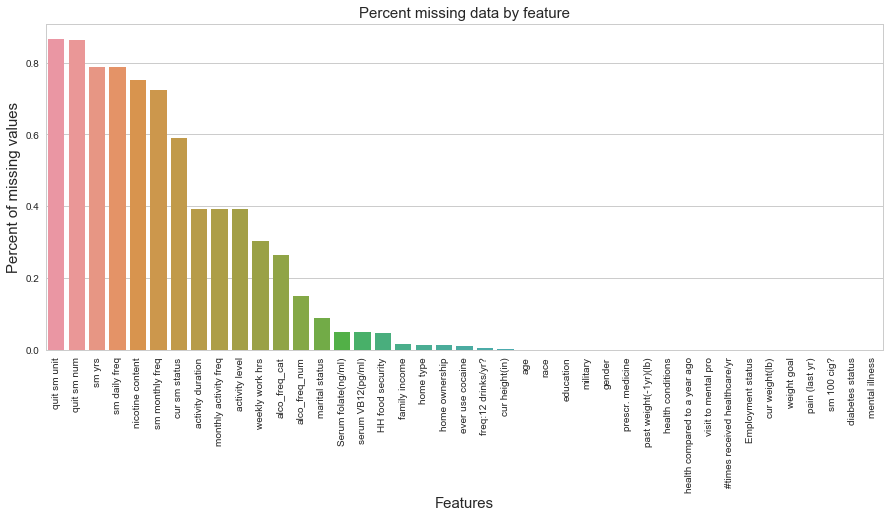

In [463]:
plot_NaN_percentage_for_all(df)
df.info()

### 2. Deal with NaN
   
    2.1 replace NaN with mean/median/average/mode: if NaN percentage is smaller than 10 %; suitable for simple linear models, not good for tree based methods; ignore relationship between the imputed variable and other variables
    2.2 replace NaN with values close to the mean value but within one standard deviation.
    2.3 drop NaN entries
    2.4 replace NaN with another category: use a constant value to group NaN as a separate category
    2.5 predict NaN using ML
    2.6 Adding new feature isnull: Adding new feature isnull indicating which rows have missing values for this feature. pro: tree based methods can understand that there was a missing value. con: double the number of features.

     

In [464]:
# function:  plot_before_after(feature0, feature, title)
# purpose:   Plot histograms showing the distribution of a feature before and after filling NaN
#            to see the change in distribution. This can tell you if the filling method is 
#            correct or not.
# input:     feature0: str0
#            feature: str
#            title of the plot

def plot_before_after(before,after,feature):
    fig, ax = plt.subplots()
    ax.hist(after,alpha=0.5,color='red')
    ax.hist(before)
    ax.legend(['after','before'])
    plt.title('Before vs. After(no NaN):'+feature)
    plt.ylabel('Frequency')

def plot_feature(feature):
    plt.figure()
    df[feature].hist()
    plt.title(feature)
    plt.ylabel('Frequency')

In [465]:
def xs_for_predicting_feature(df):
    null_cols = df.columns[df.isnull().any()].tolist()
    valid_cols = []
    for col in X: 
        if col not in null_cols: 
            valid_cols.append(col)
    return valid_cols

# function:  fill_NaN(df, feature, fill_type)
# purpose:   fill the missing values in ***one column/feature*** in the given df. 
# input:     df: the df containing the target column to be filled
#            feature: the column whose NaN's are dealt with
#            fill_type: choose among -> 'mean', 'mode', 'zero' 
#                       mean: if the feature is continuous without outliers - normal distribution
#                       median: if the feature is continuous with outliers - skewed distribution
#                       mode: if the feature is categorical
# output:    a df whose target column is filled (no more NaN in that col)

def fill_NaN(df, feature, fill_type):    
    before_filling = df[feature].dropna().copy(deep=True)
    if fill_type == 'mean':
        after_filling = df[feature].fillna(df[feature].dropna().mean())
    elif fill_type == 'mode':
        after_filling = df[feature].fillna(df[feature].dropna().mode().iloc[0])
    elif fill_type == 'std':
        after_filling = fill_NaN_std(df, feature)
#     elif fill_type == 'median':
#         after_filling = df[feature].fillna(df[feature].dropna().median())
    else:
        # fill type == 'zero' (new category)
        # set missing values as another category 
        # cannot set this new cat as 0 since there could be 0 after applying clean_epsilon function  
        # need to get a unique number representing NaN as a new category 
        new_type = 0
        after_filling = df[feature].fillna(new_type)   
    df[feature] = after_filling
    plot_before_after(before_filling, after_filling, feature)
    return df

def fill_NaN_std(df,feature):
    feature_avg = df[feature].mean()
    feature_std = df[feature].std()
    feature_null_count = df[feature].isnull().sum()
    feature_null_random_list = np.random.randint(feature_avg - feature_std, feature_avg + feature_std, size=feature_null_count)
    df[feature][np.isnan(df[feature])] = feature_null_random_list
    after_filling = df[feature].astype(int)
    return after_filling

In [466]:
# function:  predict_NaN_with_ML(df,x,y,data_type,model)
# purpose:   predict the values of NaN and fill these predicted values back into the dataframe
# input:     df: the dataframe containing the features used for prediction and target y(target feature)
#            x: a list of strings - features used for prediction - no NAN in all x's
#            y: a string - target feature
#            data_type: a string ->'categorical','numerical'
#            model: a string 
#                 if categorical data: 'random forest','linear SVC', 'knn'
#                 if numerical data:   'random forest','SVR','knn'
# output:


def predict_NaN_with_ML(df,x,y,data_type,model):
    print()
    before_filling = df[y].dropna().copy(deep=True)
        
    if data_type == 'categorical':
        if model == 'random forest':
            algo = RandomForestClassifier()
        elif model == 'linear SVC':
            algo = LinearSVC()
        elif model == 'knn':
            algo = KNeighborsClassifier(n_neighbors=10)
        else: 
            print('The model is not defined, add this model now!')
        print('Predict the missing values of',y,'using ',model,' Classifier...')
        
    else: # data_type == 'numerical' 
        if model == 'random forest':
             algo = RandomForestRegressor()
        elif model == 'SVR':
            algo = SVR()
        elif model == 'knn':
            algo = KNeighborsRegressor(n_neighbors=10)
        else: 
            print('The model is not defined, add this model now!')
        print('Predict the missing values of',y,'using ',model,' Regressor...')
    
    valid_entries = df[df[y].notnull()]                
    valid_X = valid_entries[x].values                 
    valid_y = valid_entries[y].values
    X_train, X_val, y_train, y_val = train_test_split(valid_X, valid_y, test_size=0.1, random_state = 2)
    algo.fit(X_train, y_train)   
    y_train_pred = algo.predict(X_train) 
    y_val_pred = algo.predict(X_val) 

    if data_type == 'categorical':
        train_accuracy = accuracy_score(y_train,y_train_pred)
        val_accuracy = accuracy_score(y_val,y_val_pred)
        print('train accuracy',train_accuracy)
        print('val accuracy',val_accuracy)
    else: 
        train_rmse = (mean_squared_error(y_train, y_train_pred))**(1/2)
        val_rmse = (mean_squared_error(y_val, y_val_pred))**(1/2)
        print('train_rmse',train_rmse)
        print('val_rmse',val_rmse)
    
    # if val accuracy/rmse is reasonable, predict y NaN using this model
    nan_entries = df[df[y].isnull()]                      
    X_test = nan_entries[x].astype(float)    # No NaN
    y_test = nan_entries[y].astype(float)    # All NaN -> nan_y
    
    y_test_pred = algo.predict(X_test)       # predict NaN y based on known X's    
    df.loc[df[y].isna(), y] = y_test_pred    # fill NaN y with predicted data
    
    print('Features used for predicting',y, 'are:',x)
    print('The number of predicted values:',len(y_test_pred))
    
    after_filling = df[y]
    plot_before_after(before_filling, after_filling, y)

* 35 features for now
* Drop the entire patient entry if that entry contains more than 10 NaN features out of 35 features (keep entries with more than 25 valid values)

In [467]:
before = len(df.index)
# thresh: number of valid features
df.dropna(thresh = 25,inplace = True)
after = len(df.index)
print((before-after)/before*100,'% patient entries are dropped since they contain more than 10 NaN variables')

0.06557377049180328 % patient entries are dropped since they contain more than 10 NaN variables


In [468]:
variables = df.columns.tolist()
X = variables[1:]
y = ['mental illness']
print(X)

['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'cur sm status', 'sm daily freq', 'sm monthly freq', 'quit sm num', 'quit sm unit', 'sm yrs', 'nicotine content', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']


### A. Demographics - gender, age, race, family income, education, marital status, military

In [469]:
demo_xs = ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military']
for demo_x in demo_xs:
    print(df[demo_x].value_counts())

2.0    866
1.0    658
Name: gender, dtype: int64
30.0    93
23.0    89
20.0    87
37.0    86
26.0    86
29.0    83
21.0    82
27.0    81
22.0    80
39.0    78
36.0    76
34.0    75
32.0    74
31.0    73
24.0    69
35.0    65
28.0    64
38.0    62
25.0    61
33.0    60
Name: age, dtype: int64
3.0    664
1.0    418
4.0    291
2.0     87
5.0     64
Name: race, dtype: int64
11.0    202
6.0     198
5.0     153
3.0     134
8.0     131
7.0     130
4.0     118
2.0      95
9.0      88
1.0      83
10.0     74
12.0     32
13.0     31
77.0     17
99.0     16
Name: family income, dtype: int64
3.0    714
1.0    409
2.0    398
9.0      2
7.0      1
Name: education, dtype: int64
1.0     786
5.0     273
6.0     133
3.0     105
4.0      64
2.0      26
77.0      2
99.0      1
Name: marital status, dtype: int64
2.0    1442
1.0      81
9.0       1
Name: military, dtype: int64


* After dropping NaN entries in y, we can see that the age distribution is between 20-40, something to keep in mind

In [470]:
df['age'].describe()

count    1524.000000
mean       29.274278
std         5.811854
min        20.000000
25%        24.000000
50%        29.000000
75%        34.000000
max        39.000000
Name: age, dtype: float64

In [471]:
get_cstr_ratio(df,'family income',[77,99])
get_cstr_ratio(df,'education',[7,9])
get_cstr_ratio(df,'marital status',[77,99])
get_cstr_ratio(df,'military',[7,9])
df = process_cstr(df,'family income',[77,99],'NaN')
df = process_cstr(df,'education',[7,9],'NaN')
df = process_cstr(df,'marital status',[77,99],'NaN')
df = process_cstr(df,'military',[7,9],'NaN')


The ratio of [dont know] is 0.01115485564304462
The ratio of [refuse] is 0.010498687664041995
Now call: process_cstr(df,feature,cstr,method)

The ratio of [dont know] is 0.0006561679790026247
The ratio of [refuse] is 0.0013123359580052493
Now call: process_cstr(df,feature,cstr,method)

The ratio of [dont know] is 0.0013123359580052493
The ratio of [refuse] is 0.0006561679790026247
Now call: process_cstr(df,feature,cstr,method)

The ratio of [dont know] is 0.0
The ratio of [refuse] is 0.0006561679790026247
Now call: process_cstr(df,feature,cstr,method)


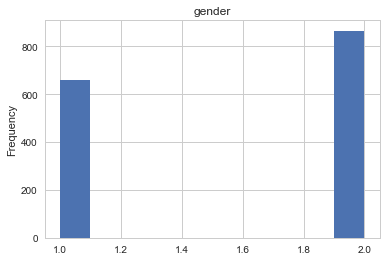

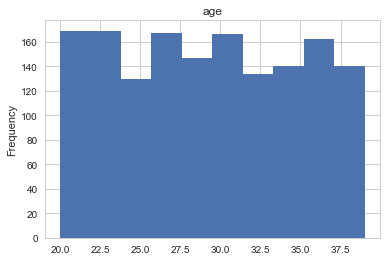

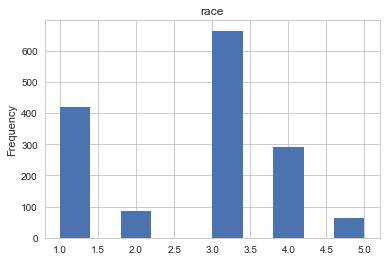

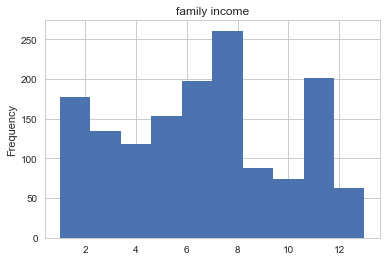

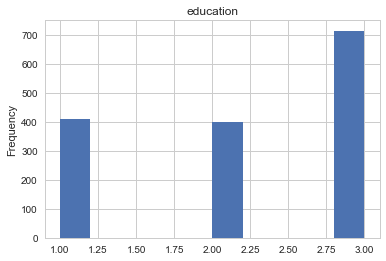

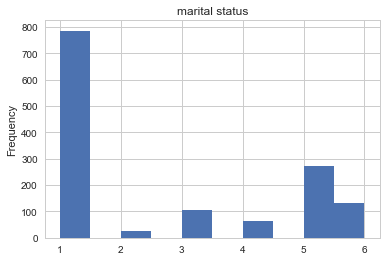

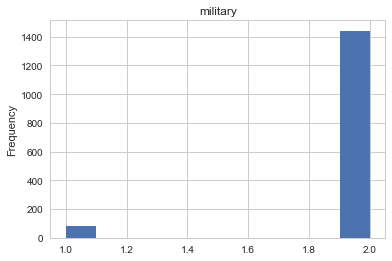

In [472]:
for demo_x in demo_xs:
    plot_feature(demo_x)

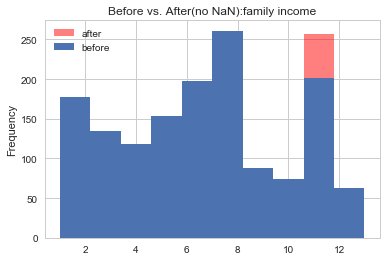

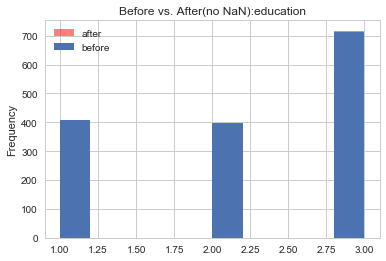

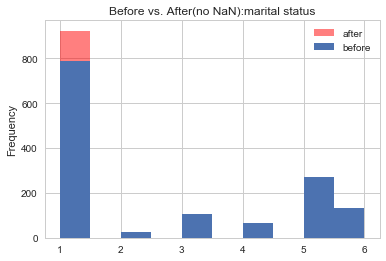

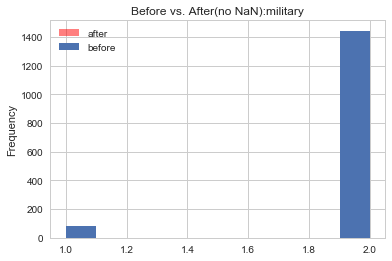

In [473]:
df = fill_NaN(df,'family income','mode')
df = fill_NaN(df,'education','mode')
df = fill_NaN(df,'marital status','mode')
df = fill_NaN(df,'military','mode')

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1524 entries, 12.0 to 20925.0
Data columns (total 41 columns):
mental illness                   1524 non-null int64
gender                           1524 non-null float64
age                              1524 non-null float64
race                             1524 non-null float64
family income                    1524 non-null float64
education                        1524 non-null float64
marital status                   1524 non-null float64
military                         1524 non-null float64
HH food security                 1453 non-null float64
home type                        1505 non-null float64
home ownership                   1505 non-null float64
health conditions                1524 non-null float64
health compared to a year ago    1524 non-null float64
visit to mental pro              1524 non-null float64
#times received healthcare/yr    1524 non-null float64
Employment status                1524 non-null float64
weekly 

### B. Household food security -HH food security


NaN    71
1.0    1073
3.0     166
2.0     127
4.0      87
Name: HH food security, dtype: int64

The NaN ratio in HH food security is 0.047
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


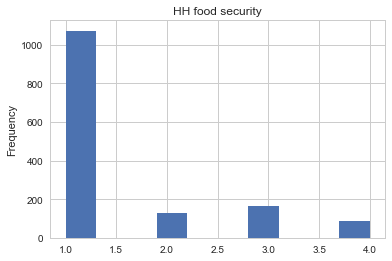

In [475]:
feature_info(df,'HH food security')

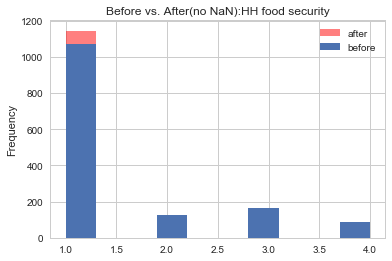

In [476]:
df = fill_NaN(df, 'HH food security', 'mode')

### B-C. 1. Serum folate and 2. VB12; 3. diabetes, 4. pain, 5. prescription medicine


NaN    76
10.2    21
9.6     20
9.3     19
9.8     17
9.7     17
10.9    16
10.6    15
8.3     15
7.5     14
8.8     14
8.1     14
11.3    14
10.0    13
6.3     13
10.5    13
8.5     13
9.5     13
9.1     13
7.0     12
14.6    12
6.9     12
7.9     12
10.4    12
11.6    12
12.5    12
8.2     12
7.8     12
16.7    11
11.4    11
15.6    11
        ..
24.2     1
25.1     1
3.1      1
33.7     1
28.4     1
43.6     1
43.3     1
24.6     1
21.8     1
30.9     1
27.2     1
28.7     1
2.5      1
24.5     1
20.5     1
66.7     1
44.0     1
20.1     1
20.9     1
32.4     1
38.4     1
2.6      1
23.4     1
25.6     1
34.6     1
32.6     1
30.1     1
2.7      1
69.9     1
28.2     1
Name: Serum folate(ng/ml), Length: 270, dtype: int64

The NaN ratio in Serum folate(ng/ml) is 0.050
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


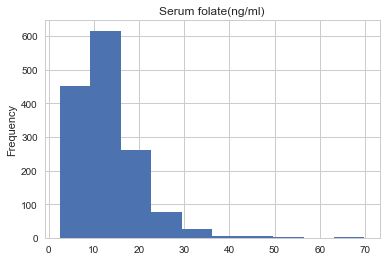

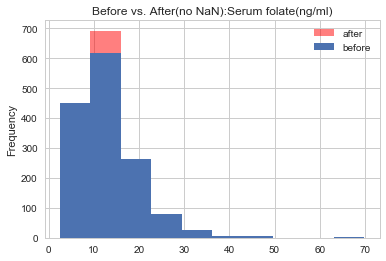

In [477]:
feature_info(df,'Serum folate(ng/ml)')
df = fill_NaN(df, 'Serum folate(ng/ml)', 'mean')

for serum VB12(pg/ml)
2 outliers detected
[24885.0, 148320.0]



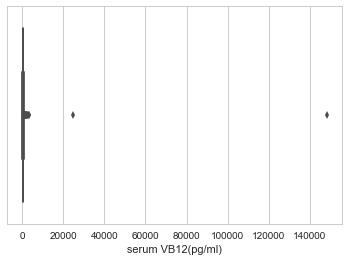

In [478]:
df['serum VB12(pg/ml)'].describe()
outlier(df,'serum VB12(pg/ml)',convert=True)


NaN    77
552.0     12
376.0     10
317.0      8
334.0      8
340.0      7
278.0      7
388.0      7
305.0      7
509.0      7
406.0      7
261.0      7
309.0      7
453.0      6
314.0      6
510.0      6
368.0      6
386.0      6
423.0      6
462.0      6
525.0      6
206.0      6
465.0      6
403.0      6
451.0      6
348.0      6
329.0      6
288.0      6
521.0      6
452.0      6
413.0      5
          ..
747.0      1
338.0      1
426.0      1
1192.0     1
838.0      1
450.0      1
913.0      1
1189.0     1
779.0      1
695.0      1
836.0      1
993.0      1
645.0      1
911.0      1
809.0      1
1261.0     1
715.0      1
739.0      1
1595.0     1
564.0      1
3117.0     1
818.0      1
635.0      1
677.0      1
652.0      1
737.0      1
237.0      1
814.0      1
347.0      1
655.0      1
Name: serum VB12(pg/ml), Length: 604, dtype: int64

The NaN ratio in serum VB12(pg/ml) is 0.051
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call functi

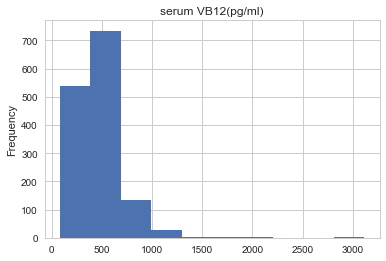

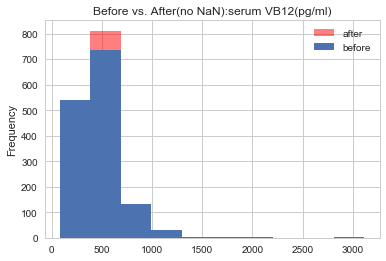

In [479]:
feature_info(df,'serum VB12(pg/ml)')
df = fill_NaN(df, 'serum VB12(pg/ml)', 'mean')


NaN    0
2.0    1484
1.0      31
3.0       9
Name: diabetes status, dtype: int64

The NaN ratio in diabetes status is 0.000
No missing values detected


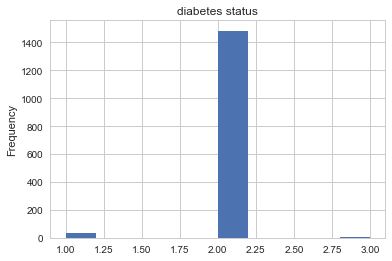

In [480]:
feature_info(df,'diabetes status')
df['diabetes status'][df['diabetes status']==3] = 1


NaN    0
2.0    1061
1.0     463
Name: pain (last yr), dtype: int64

The NaN ratio in pain (last yr) is 0.000
No missing values detected


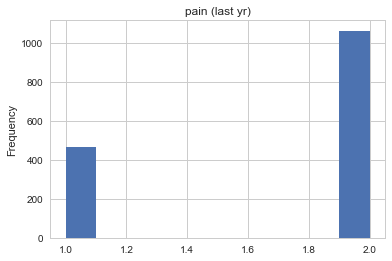

In [481]:
feature_info(df,'pain (last yr)')


NaN    0
2.0    1090
1.0     434
Name: prescr. medicine, dtype: int64

The NaN ratio in prescr. medicine is 0.000
No missing values detected


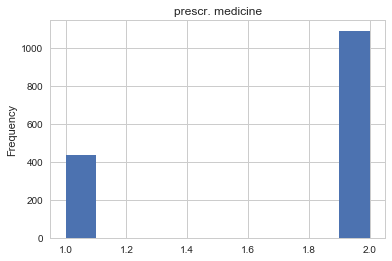

In [482]:
feature_info(df,'prescr. medicine')

### C. Housing characteristics: home type, home ownership


NaN    19
2.0    764
4.0    460
1.0    135
3.0    129
5.0      9
6.0      8
Name: home type, dtype: int64

The NaN ratio in home type is 0.012
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


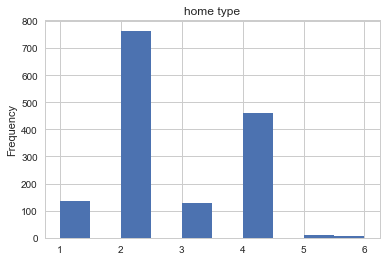

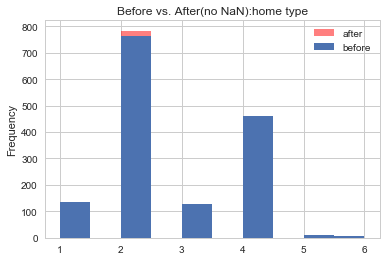

In [483]:
feature_info(df,'home type')
df = fill_NaN(df,'home type','mode')


NaN    19
1.0    750
2.0    717
3.0     36
9.0      2
Name: home ownership, dtype: int64

The NaN ratio in home ownership is 0.012
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


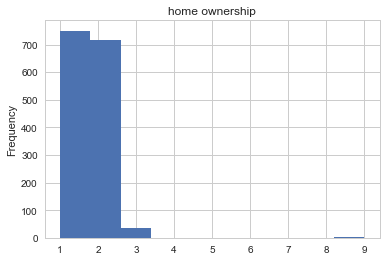

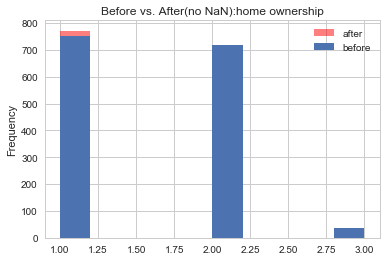

In [484]:
feature_info(df,'home ownership')
df = process_cstr(df,'home ownership',[7,9],'NaN')
df = fill_NaN(df,'home ownership','mode')

### D. Hospital utilization and access to care:  'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr'


NaN    0
3.0    503
2.0    484
1.0    367
4.0    154
5.0     14
7.0      1
9.0      1
Name: health conditions, dtype: int64

The NaN ratio in health conditions is 0.000
No missing values detected


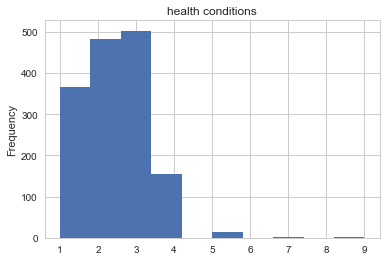

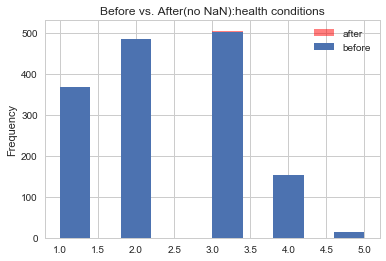

In [485]:
feature_info(df, 'health conditions')
df = process_cstr(df,'health conditions',[7,9],'NaN')
df = fill_NaN(df,'health conditions','mode')


NaN    0
3.0    1111
1.0     289
2.0     123
9.0       1
Name: health compared to a year ago, dtype: int64

The NaN ratio in health compared to a year ago is 0.000
No missing values detected


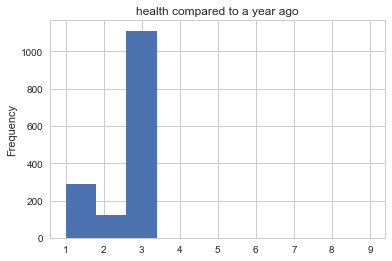

In [486]:
feature_info(df, 'health compared to a year ago')


NaN    0
2.0    1411
1.0     113
Name: visit to mental pro, dtype: int64

The NaN ratio in visit to mental pro is 0.000
No missing values detected


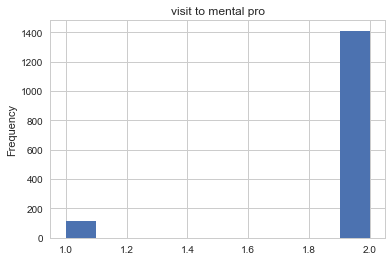

In [487]:
feature_info(df, 'visit to mental pro')


NaN    0
2.0    365
0.0    359
1.0    307
3.0    279
4.0    113
5.0    101
Name: #times received healthcare/yr, dtype: int64

The NaN ratio in #times received healthcare/yr is 0.000
No missing values detected


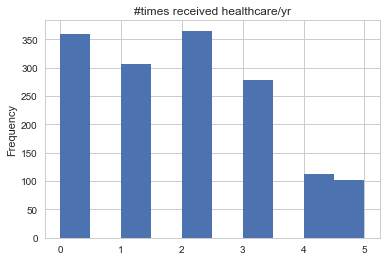

In [488]:
feature_info(df, '#times received healthcare/yr')

### E. Occupation: 'Employment status', 'weekly work hrs'


NaN    0
1.0    1053
4.0     368
2.0      52
3.0      50
9.0       1
Name: Employment status, dtype: int64

The NaN ratio in Employment status is 0.000
No missing values detected


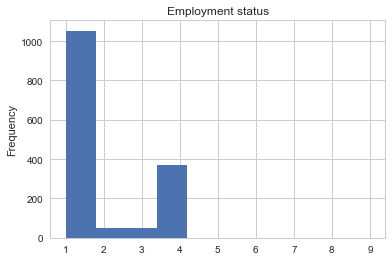

In [489]:
feature_info(df,'Employment status')
df = process_cstr(df,'Employment status',[7,9],'drop')



NaN    459
40.0     373
50.0      82
45.0      57
60.0      56
30.0      47
35.0      34
48.0      28
55.0      27
20.0      25
32.0      23
24.0      21
25.0      17
36.0      14
38.0      13
44.0      13
80.0      11
43.0      11
70.0      11
42.0      10
15.0      10
54.0       9
16.0       9
47.0       9
56.0       8
52.0       7
10.0       7
12.0       6
17.0       6
37.0       6
34.0       6
        ... 
13.0       3
28.0       3
27.0       3
7.0        2
33.0       2
6.0        2
1.0        2
14.0       2
57.0       2
26.0       2
82.0       2
100.0      2
21.0       2
19.0       2
29.0       2
22.0       2
39.0       1
2.0        1
84.0       1
92.0       1
23.0       1
77.0       1
64.0       1
78.0       1
11.0       1
90.0       1
86.0       1
61.0       1
59.0       1
66.0       1
Name: weekly work hrs, Length: 75, dtype: int64

The NaN ratio in weekly work hrs is 0.302
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability,

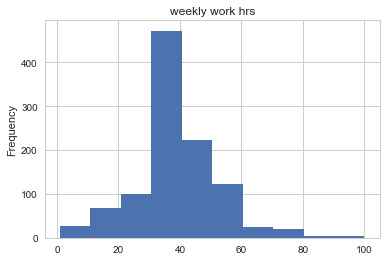

In [490]:
df = process_cstr(df,'weekly work hrs',[77777,99999],'drop')
feature_info(df,'weekly work hrs')

for weekly work hrs
6 outliers detected
[84.0, 86.0, 90.0, 92.0, 100.0, 100.0]



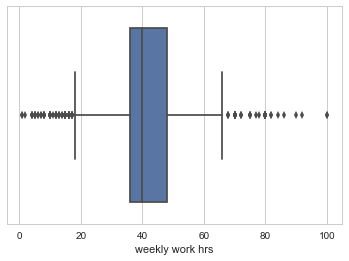

In [491]:
# convert outliers into NaN
outlier(df,'weekly work hrs',convert=True)

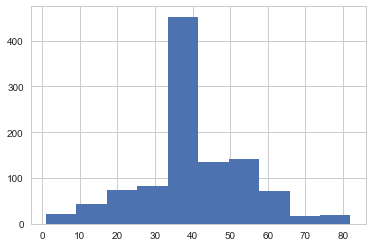

In [492]:
df['weekly work hrs'].hist()


Predict the missing values of weekly work hrs using  knn  Regressor...
train_rmse 12.222342971713378
val_rmse 14.791991714029741
Features used for predicting weekly work hrs are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 465


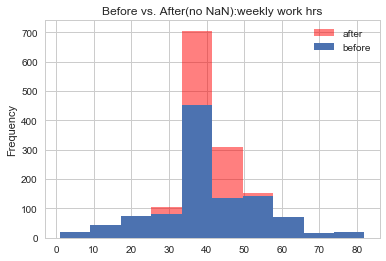

In [493]:
x_weekly_work_hrs = xs_for_predicting_feature(df)

predict_NaN_with_ML(df,data_type='numerical',model='knn',x=x_weekly_work_hrs,y='weekly work hrs')


### F. Weight history: 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)'


NaN    3
65.0      152
64.0      136
66.0      131
67.0      121
68.0      121
69.0      106
63.0      105
70.0       99
62.0       98
71.0       80
72.0       71
60.0       62
61.0       51
73.0       38
74.0       33
9999.0     32
59.0       30
75.0       20
77.0        8
76.0        6
58.0        4
56.0        3
78.0        3
55.0        2
54.0        2
57.0        2
80.0        1
49.0        1
41.0        1
Name: cur height(in), dtype: int64

The NaN ratio in cur height(in) is 0.002
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

NaN    0
150.0    69
160.0    62
140.0    62
180.0    60
170.0    53
190.0    53
185.0    52
130.0    48
165.0    48
145.0    48
155.0    43
200.0    39
125.0    37
135.0    36
175.0    30
120.0    28
220.0    22
230.0    22
215.0    20
205.0    20
115.0    20
195.0    19
110.0    16
225.0    15
210.0    15
142.0    14
250.0    14
240.0    14
105.0    12
176.0    12


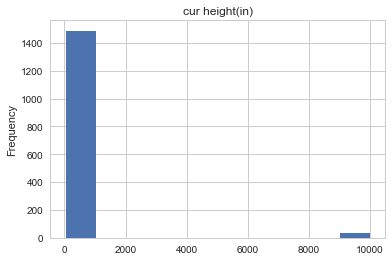

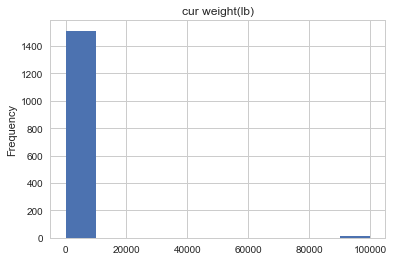

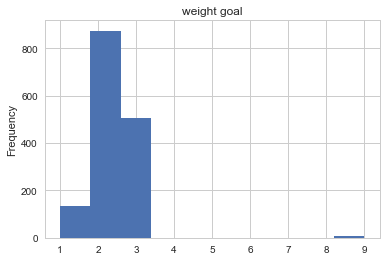

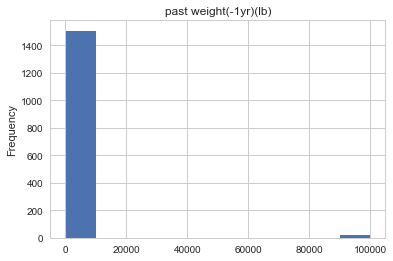

In [494]:
wh_xs = ['cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)']
for x in wh_xs:
    feature_info(df,x)

In [495]:
df = process_cstr(df,'cur height(in)',[7777,9999],'NaN')
df = process_cstr(df,'cur weight(lb)',[77777,99999],'NaN')
df = process_cstr(df,'cur weight(lb)',[7777,9999],'NaN')

df = process_cstr(df,'weight goal',[7,9],'NaN')
df = process_cstr(df,'past weight(-1yr)(lb)',[77777,99999],'NaN')
df = process_cstr(df,'past weight(-1yr)(lb)',[7777,9999],'NaN')

for cur height(in)
5 outliers detected
[41.0, 49.0, 54.0, 54.0, 80.0]

for cur weight(lb)
17 outliers detected
[304.0, 306.0, 310.0, 312.0, 317.0, 318.0, 321.0, 327.0, 330.0, 340.0, 343.0, 345.0, 350.0, 362.0, 375.0, 380.0, 385.0]

for past weight(-1yr)(lb)
23 outliers detected
[306.0, 308.0, 310.0, 310.0, 317.0, 320.0, 320.0, 320.0, 325.0, 325.0, 327.0, 330.0, 330.0, 335.0, 340.0, 340.0, 343.0, 350.0, 360.0, 380.0, 380.0, 385.0, 430.0]



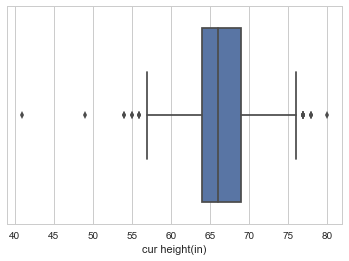

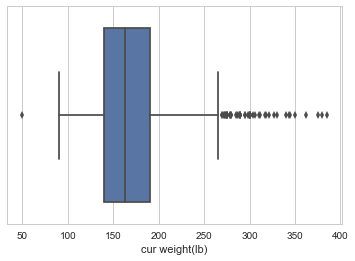

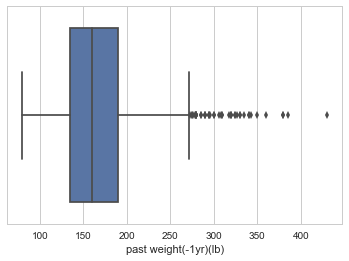

In [496]:
# for numerical variables, check for outliers
outlier(df,'cur height(in)',convert=False)
outlier(df,'cur weight(lb)',convert=False)
outlier(df,'past weight(-1yr)(lb)',convert=False)

Although outliers are detected, these values seem possible. Consider them as natural outliers for now

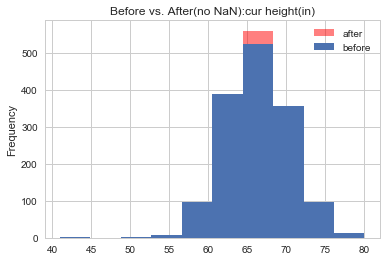

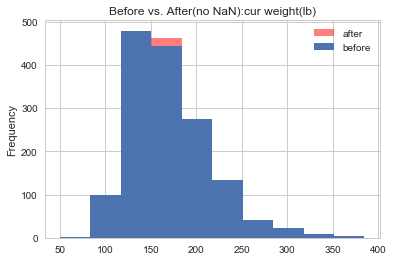

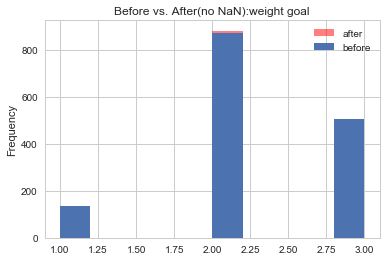

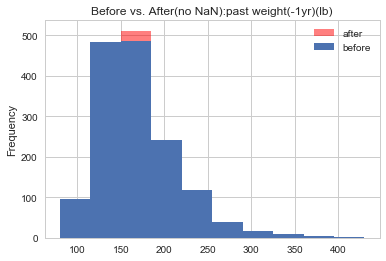

In [497]:
df = fill_NaN(df, 'cur height(in)', 'mean')
df = fill_NaN(df, 'cur weight(lb)', 'mean')
df = fill_NaN(df, 'weight goal', 'mode')
df = fill_NaN(df, 'past weight(-1yr)(lb)', 'mean')

In [498]:
print(X)

['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'cur sm status', 'sm daily freq', 'sm monthly freq', 'quit sm num', 'quit sm unit', 'sm yrs', 'nicotine content', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']


### G. Alcohol use: 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat'


NaN    5
1.0    1083
2.0     434
Name: freq:12 drinks/yr?, dtype: int64

The NaN ratio in freq:12 drinks/yr? is 0.003
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

NaN    230
1.0      358
2.0      328
3.0      167
0.0      167
4.0       79
5.0       52
6.0       43
7.0       36
10.0      14
12.0       9
8.0        7
15.0       6
30.0       4
20.0       3
999.0      3
21.0       2
14.0       2
16.0       2
320.0      1
35.0       1
212.0      1
32.0       1
26.0       1
36.0       1
18.0       1
60.0       1
100.0      1
75.0       1
Name: alco_freq_num, dtype: int64

The NaN ratio in alco_freq_num is 0.151
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)

NaN    400
1.0    402
3.0    377
2.0    343
Name: alco_freq_cat, 

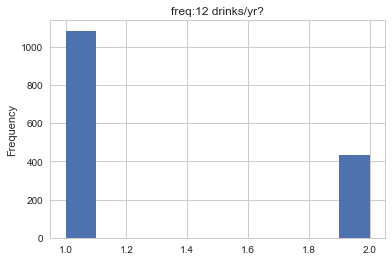

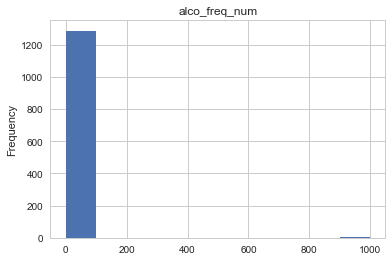

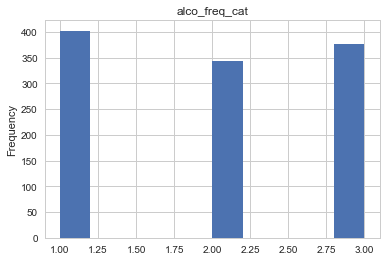

In [499]:
for x in ['freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat']:
    feature_info(df,x)

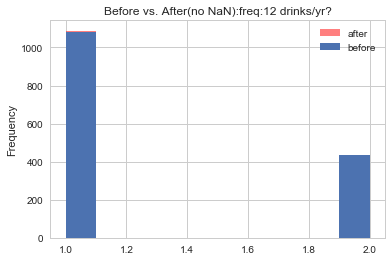

In [500]:
df = fill_NaN(df, 'freq:12 drinks/yr?', 'mode')
df = process_cstr(df,'alco_freq_num',[777,999],'NaN')

for alco_freq_num
5 outliers detected
[60.0, 75.0, 100.0, 212.0, 320.0]



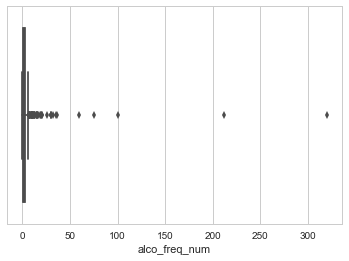

In [501]:
outlier(df,'alco_freq_num',convert=True)



Predict the missing values of alco_freq_num using  knn  Regressor...
train_rmse 3.330235356918116
val_rmse 3.1838862704163504
Features used for predicting alco_freq_num are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'freq:12 drinks/yr?', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 238


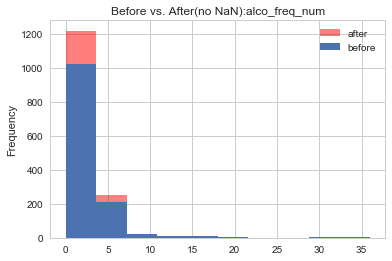

In [502]:
x_alco_freq_num = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,data_type='numerical',model='knn',x=x_alco_freq_num,y='alco_freq_num')


Predict the missing values of alco_freq_cat using  knn  Classifier...
train accuracy 0.5213082259663032
val accuracy 0.30973451327433627
Features used for predicting alco_freq_cat are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'freq:12 drinks/yr?', 'alco_freq_num', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 400


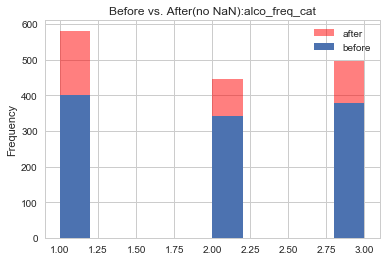

In [503]:
x_alco_freq_cat = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,data_type='categorical',model='knn',x=x_alco_freq_cat,y='alco_freq_cat')

### H. Drug use: 'ever use cocaine'


NaN    17
2.0    1201
1.0     301
7.0       3
Name: ever use cocaine, dtype: int64

The NaN ratio in ever use cocaine is 0.011
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


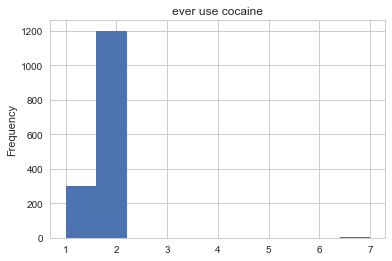

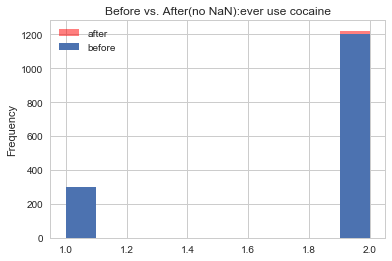

In [504]:
feature_info(df,'ever use cocaine')
df = process_cstr(df,'ever use cocaine',[7,9],'NaN')
df = fill_NaN(df, 'ever use cocaine', 'mode')

### I. Physical acitivity: 'activity level', 'monthly activity freq', 'activity duration'


NaN    595
1.0    669
2.0    258
Name: activity level, dtype: int64

The NaN ratio in activity level is 0.391
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)

NaN    596
4.0      156
1.0      126
2.0      119
9.0      117
13.0      84
30.0      76
3.0       64
21.0      40
17.0      22
5.0       21
10.0      18
6.0       14
15.0      12
60.0      12
8.0        9
12.0       6
20.0       6
90.0       5
7.0        5
25.0       2
120.0      2
300.0      1
26.0       1
86.0       1
14.0       1
29.0       1
18.0       1
27.0       1
16.0       1
150.0      1
210.0      1
Name: monthly activity freq, dtype: int64

The NaN ratio in monthly activity freq is 0.392
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)


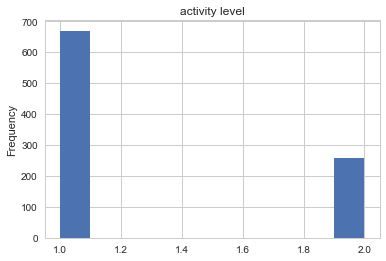

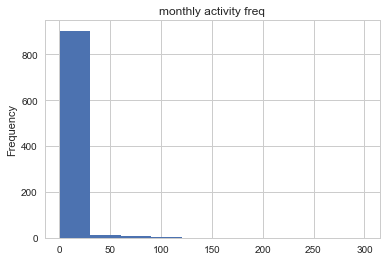

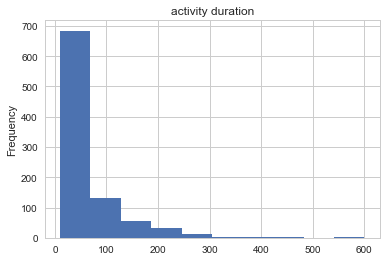

In [505]:
for x in ['activity level', 'monthly activity freq', 'activity duration']:
    feature_info(df,x)

for monthly activity freq
11 outliers detected
[86.0, 90.0, 90.0, 90.0, 90.0, 90.0, 120.0, 120.0, 150.0, 210.0, 300.0]



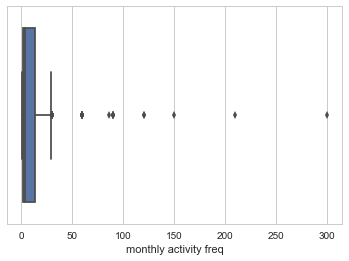

In [506]:
outlier(df,'monthly activity freq',convert=True)



Predict the missing values of monthly activity freq using  knn  Regressor...
train_rmse 9.416849122058096
val_rmse 12.269620489506664
Features used for predicting monthly activity freq are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 607


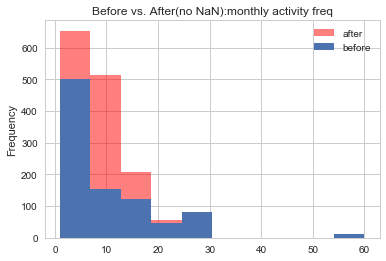

In [507]:
x_act_freq = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_act_freq,'monthly activity freq','numerical','knn')

for activity duration
22 outliers detected
[300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 360.0, 360.0, 420.0, 420.0, 420.0, 480.0, 480.0, 480.0, 600.0]



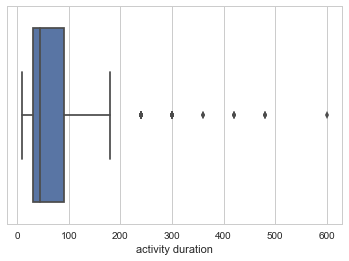

In [508]:
outlier(df,'activity duration',convert=True)



Predict the missing values of activity duration using  knn  Regressor...
train_rmse 51.938107740563254
val_rmse 60.964258129093714
Features used for predicting activity duration are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'monthly activity freq', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 618


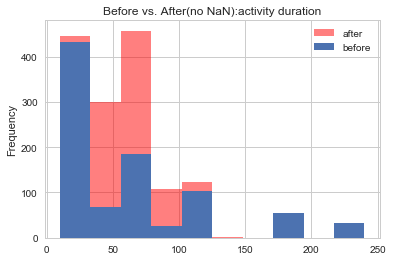

In [509]:
x_act_dur = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_act_dur,'activity duration','numerical','knn')


Predict the missing values of activity level using  knn  Classifier...
train accuracy 0.7338129496402878
val accuracy 0.6666666666666666
Features used for predicting activity level are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 595


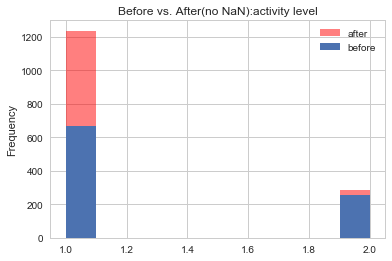

In [510]:
x_act_level = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_act_level,'activity level','categorical','knn')

### J. Smoking: 'sm 100 cig?', 'cur sm status', 'sm daily freq', 'sm monthly freq', 'quit sm num', 'quit sm unit', 'sm yrs', 'nicotine content'

* if ['cur sm status']==3, answer 'not at all' to question 'do you now smoke?'
    * set sm daily/monthly freq NaN to 0
* if ['cur sm status']==1/2, answer yes to question 'do you now smoke?'
    * set quit sm num NaN to 0 

In [511]:
df.loc[df['cur sm status']==3,'sm daily freq'] = 0
df.loc[df['cur sm status']==3,'sm monthly freq'] = 0
df.loc[df['cur sm status']==1,'quit sm num'] = 0
df.loc[df['cur sm status']==2,'quit sm num'] = 0


NaN    0
2.0    895
1.0    627
Name: sm 100 cig?, dtype: int64

The NaN ratio in sm 100 cig? is 0.000
No missing values detected

NaN    895
1.0    323
3.0    207
2.0     97
Name: cur sm status, dtype: int64

The NaN ratio in cur sm status is 0.588
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)

NaN    992
0.0     207
20.0     93
10.0     61
15.0     26
5.0      18
3.0      16
30.0     15
6.0      15
1.0      14
4.0      11
7.0      11
8.0       7
40.0      6
12.0      6
2.0       6
25.0      5
11.0      4
14.0      2
13.0      2
17.0      1
22.0      1
9.0       1
18.0      1
60.0      1
Name: sm daily freq, dtype: int64

The NaN ratio in sm daily freq is 0.652
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,

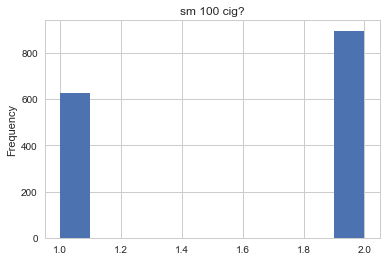

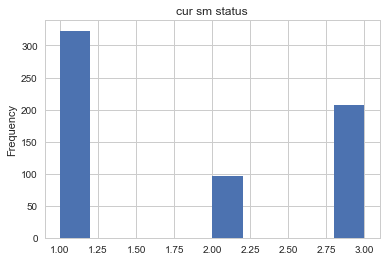

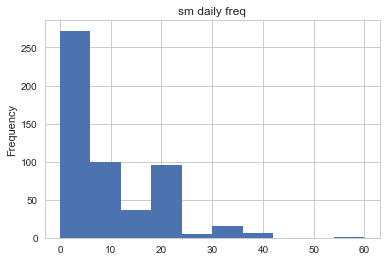

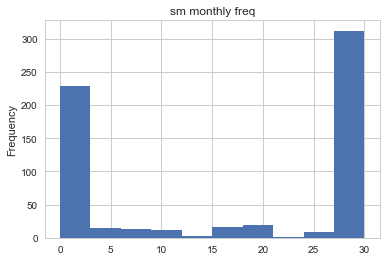

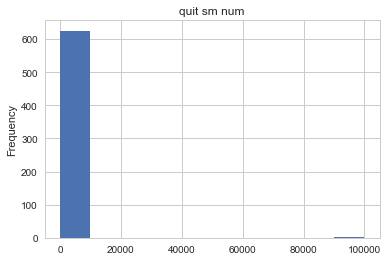

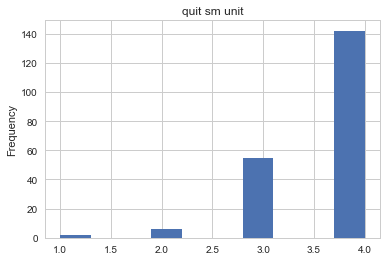

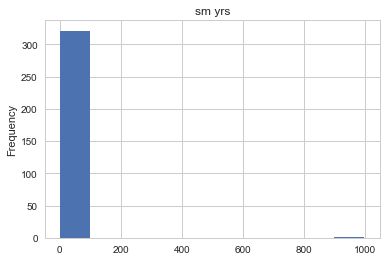

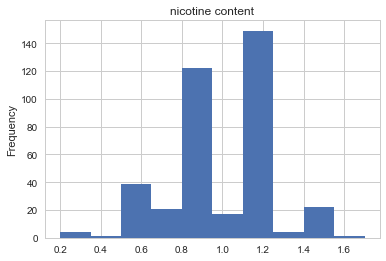

In [512]:
for j in ['sm 100 cig?', 'cur sm status', 'sm daily freq', 'sm monthly freq', 'quit sm num', 'quit sm unit', 'sm yrs', 'nicotine content']:
    feature_info(df,j)

In [513]:
df = process_cstr(df,'sm 100 cig?',[7,9],'NaN')
df = process_cstr(df,'quit sm num',[77777,99999],'NaN')
df = process_cstr(df,'sm yrs',[777,999],'NaN')


Predict the missing values of cur sm status using  knn  Classifier...
train accuracy 0.5656028368794326
val accuracy 0.49206349206349204
Features used for predicting cur sm status are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 895


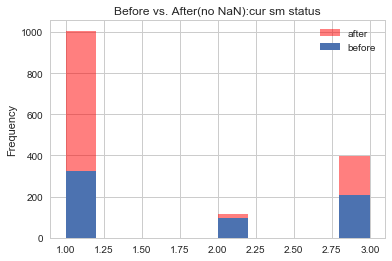

In [514]:
x_cur_sm_status = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_cur_sm_status,'cur sm status','categorical','knn')

for sm daily freq
7 outliers detected
[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 60.0]



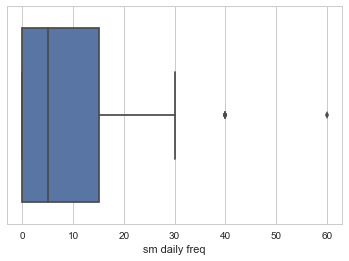

In [515]:
outlier(df,'sm daily freq',convert=False)


Predict the missing values of sm daily freq using  knn  Regressor...
train_rmse 9.148527507503902
val_rmse 8.857424132565344
Features used for predicting sm daily freq are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'cur sm status', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 992


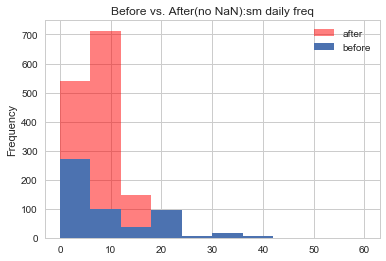

In [516]:
x_sm_daily_freq = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_sm_daily_freq,'sm daily freq','numerical','knn')


Predict the missing values of sm monthly freq using  knn  Regressor...
train_rmse 12.647579170151426
val_rmse 14.134995409907116
Features used for predicting sm monthly freq are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'cur sm status', 'sm daily freq', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 895


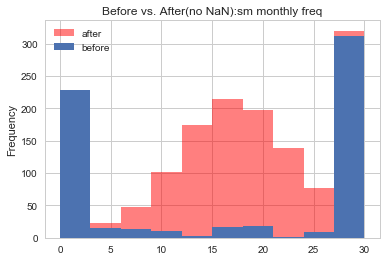

In [517]:
x_sm_monthly_freq = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_sm_monthly_freq,'sm monthly freq','numerical','knn')

for quit sm num
19 outliers detected
[16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 21.0, 27.0]



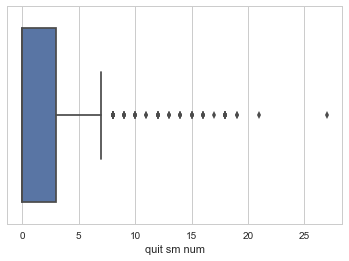

In [518]:
outlier(df,'quit sm num',convert=False)


Predict the missing values of quit sm num using  knn  Regressor...
train_rmse 3.6352049876851655
val_rmse 2.398941565549406
Features used for predicting quit sm num are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'cur sm status', 'sm daily freq', 'sm monthly freq', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 897


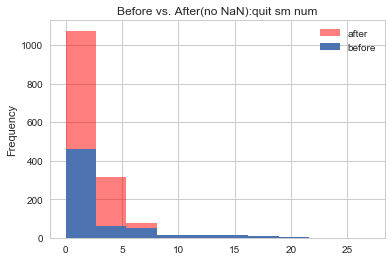

In [519]:
x_quit_sm_num = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_quit_sm_num,'quit sm num','numerical','knn')


Predict the missing values of quit sm unit using  knn  Classifier...
train accuracy 0.6956521739130435
val accuracy 0.5238095238095238
Features used for predicting quit sm unit are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'cur sm status', 'sm daily freq', 'sm monthly freq', 'quit sm num', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 1317


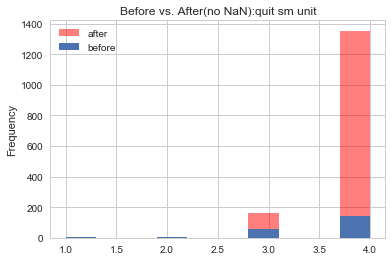

In [520]:
x_quit_sm_unit = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_quit_sm_unit,'quit sm unit','categorical','knn')

for sm yrs
1 outliers detected
[27.0]



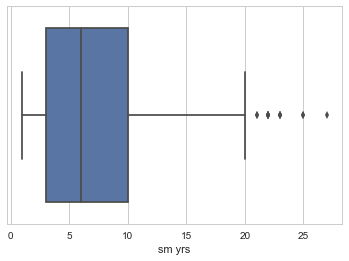

In [521]:
outlier(df,'sm yrs',convert=False)


Predict the missing values of sm yrs using  knn  Regressor...
train_rmse 5.728816655975105
val_rmse 6.25757722503468
Features used for predicting sm yrs are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'cur sm status', 'sm daily freq', 'sm monthly freq', 'quit sm num', 'quit sm unit', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 1201


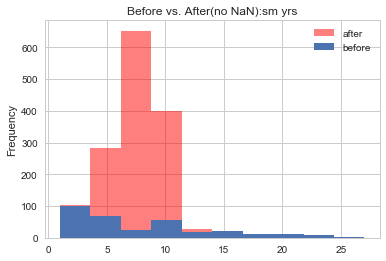

In [522]:
x_sm_yrs = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_sm_yrs,'sm yrs','numerical','knn')

for nicotine content
0 outliers detected
[]



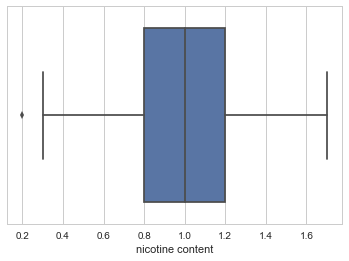

In [523]:
outlier(df,'nicotine content',convert=False)


Predict the missing values of nicotine content using  knn  Regressor...
train_rmse 0.24663406612449024
val_rmse 0.25991901572767256
Features used for predicting nicotine content are: ['gender', 'age', 'race', 'family income', 'education', 'marital status', 'military', 'HH food security', 'home type', 'home ownership', 'health conditions', 'health compared to a year ago', 'visit to mental pro', '#times received healthcare/yr', 'Employment status', 'weekly work hrs', 'cur height(in)', 'cur weight(lb)', 'weight goal', 'past weight(-1yr)(lb)', 'sm 100 cig?', 'cur sm status', 'sm daily freq', 'sm monthly freq', 'quit sm num', 'quit sm unit', 'sm yrs', 'freq:12 drinks/yr?', 'alco_freq_num', 'alco_freq_cat', 'ever use cocaine', 'activity level', 'monthly activity freq', 'activity duration', 'Serum folate(ng/ml)', 'serum VB12(pg/ml)', 'diabetes status', 'pain (last yr)', 'prescr. medicine']
The number of predicted values: 1142


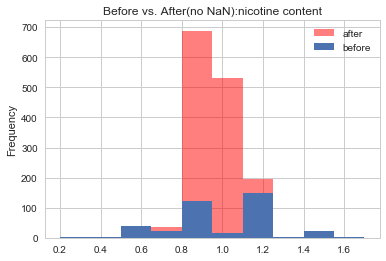

In [524]:
x_nicotine_content = xs_for_predicting_feature(df)
predict_NaN_with_ML(df,x_nicotine_content,'nicotine content','numerical','knn')

## SUMMARY

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1522 entries, 12.0 to 20925.0
Data columns (total 41 columns):
mental illness                   1522 non-null int64
gender                           1522 non-null float64
age                              1522 non-null float64
race                             1522 non-null float64
family income                    1522 non-null float64
education                        1522 non-null float64
marital status                   1522 non-null float64
military                         1522 non-null float64
HH food security                 1522 non-null float64
home type                        1522 non-null float64
home ownership                   1522 non-null float64
health conditions                1522 non-null float64
health compared to a year ago    1522 non-null float64
visit to mental pro              1522 non-null float64
#times received healthcare/yr    1522 non-null float64
Employment status                1522 non-null float64
weekly 

In [526]:
df.head(20)

,mental illness,gender,age,race,family income,education,marital status,military,HH food security,home type,...,alco_freq_cat,ever use cocaine,activity level,monthly activity freq,activity duration,Serum folate(ng/ml),serum VB12(pg/ml),diabetes status,pain (last yr),prescr. medicine
SEQN,,,,,,,,,,,,,,,,,,,,,
12.0,0,1.0,37.0,3.0,11.0,3.0,1.0,1.0,1.0,2.0,...,2.0,1.0,1.0,4.0,90.0,23.000000,730.000000,2.0,2.0,1.0
20.0,0,2.0,23.0,1.0,6.0,1.0,1.0,2.0,1.0,4.0,...,1.0,1.0,1.0,1.0,30.0,19.900000,260.000000,2.0,1.0,2.0
34.0,1,2.0,38.0,4.0,5.0,2.0,1.0,2.0,3.0,1.0,...,1.0,1.0,1.0,30.0,30.0,8.400000,1218.000000,2.0,1.0,2.0
66.0,0,1.0,37.0,1.0,6.0,3.0,5.0,2.0,1.0,2.0,...,3.0,2.0,2.0,15.0,20.0,12.100000,498.000000,2.0,2.0,2.0
69.0,0,1.0,27.0,4.0,5.0,3.0,5.0,2.0,2.0,4.0,...,1.0,2.0,1.0,9.4,15.0,6.000000,661.000000,2.0,2.0,2.0
81.0,0,1.0,30.0,3.0,6.0,3.0,6.0,1.0,1.0,5.0,...,1.0,2.0,1.0,1.0,87.5,8.200000,615.000000,2.0,2.0,2.0
97.0,0,1.0,32.0,4.0,11.0,3.0,5.0,1.0,1.0,2.0,...,1.0,1.0,1.0,9.0,20.0,13.017749,482.714582,2.0,1.0,2.0
107.0,0,2.0,30.0,1.0,11.0,2.0,1.0,2.0,2.0,2.0,...,3.0,2.0,1.0,13.0,63.0,14.300000,2902.000000,2.0,2.0,2.0
120.0,0,2.0,30.0,3.0,7.0,3.0,6.0,2.0,1.0,2.0,...,1.0,1.0,1.0,2.0,60.0,9.900000,207.000000,2.0,2.0,1.0


### Export dataframe as a csv file

In [527]:
df.to_csv('Depression Project Part 1.csv',index=True,sep=',')